In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import pyreadr
from sfrancia import shapiroFrancia

In [2]:
# Carregar o arquivo RData
result = pyreadr.read_r('empresas.RData')

# Extrair o DataFrame
df_empresas = result['empresas']

# Agora, df é um DataFrame do pandas
print(df_empresas.head())

  empresa  retorno  disclosure  endividamento  ativos  liquidez
0  Adidas    63.67        83.0            1.3  3967.0      14.3
1    BASF    55.49        91.0           33.9  5450.0      16.8
2   Bayer    52.42        77.0           36.1  4327.0      15.5
3     BSH    54.00        90.0           20.8  4109.0      16.8
4   Bosch    68.01        93.0           14.1  4458.0      17.0


In [3]:
#Características das variáveis do dataset
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   empresa        124 non-null    object 
 1   retorno        124 non-null    float64
 2   disclosure     124 non-null    float64
 3   endividamento  124 non-null    float64
 4   ativos         124 non-null    float64
 5   liquidez       124 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.9+ KB


In [4]:
#Estatísticas univariadas
df_empresas.describe()

,retorno,disclosure,endividamento,ativos,liquidez
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,46.195484,49.677419,27.734677,3739.064516,12.300000
std,15.075886,31.338059,12.454287,1538.500462,3.141746
min,21.030000,6.000000,1.200000,1851.000000,7.900000
25%,33.840000,18.000000,18.525000,2597.000000,9.300000
50%,44.175000,41.000000,24.950000,3476.000000,12.200000
75%,58.205000,83.000000,34.125000,4458.000000,15.800000
max,86.180000,98.000000,64.900000,9010.000000,17.000000


In [5]:
# In[ ]: Matriz de correlações

corr = df_empresas.corr()
corr

C:\Users\carlo\AppData\Local\Temp\ipykernel_7724\2375689254.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_empresas.corr()


,retorno,disclosure,endividamento,ativos,liquidez
retorno,1.000000,0.863747,0.004577,0.811349,0.859083
disclosure,0.863747,1.000000,0.136587,0.831343,0.867605
endividamento,0.004577,0.136587,1.000000,0.228085,-0.081803
ativos,0.811349,0.831343,0.228085,1.000000,0.702286
liquidez,0.859083,0.867605,-0.081803,0.702286,1.000000


C:\Users\carlo\AppData\Local\Temp\ipykernel_7724\3243759954.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_empresas.corr(), annot=True, cmap = plt.cm.viridis,


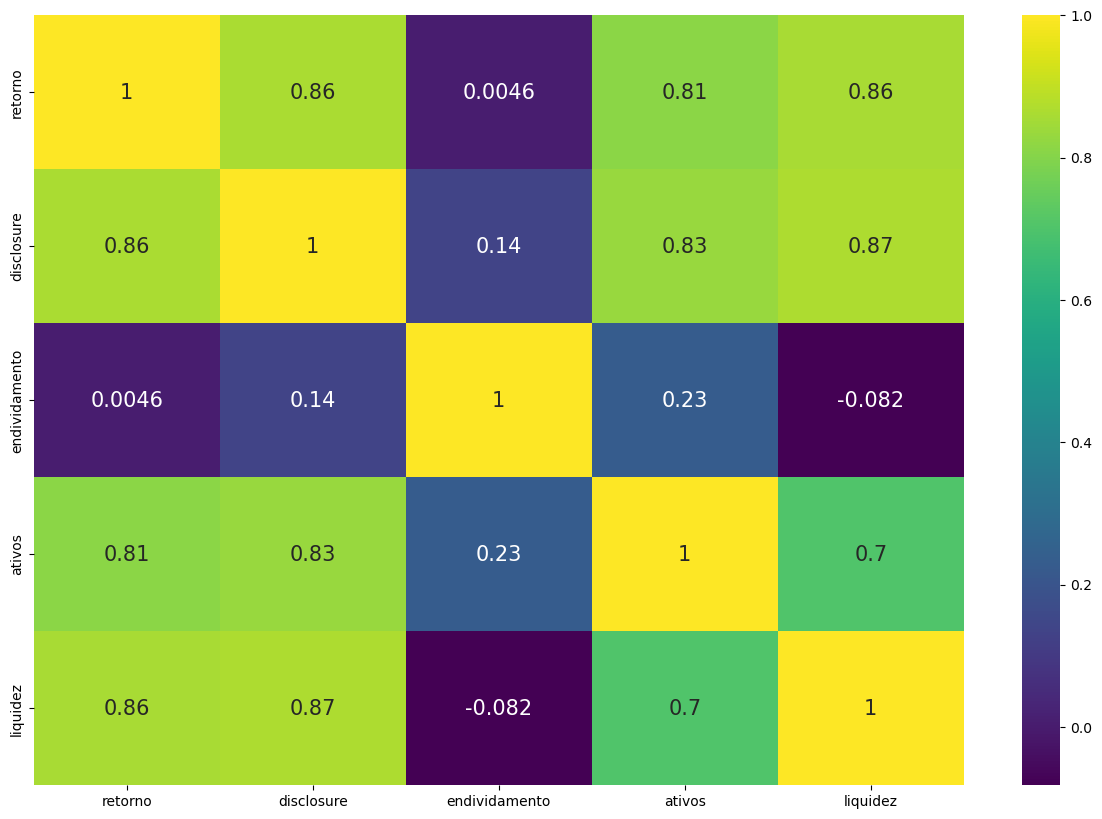

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df_empresas.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':15})
plt.show()

<Figure size 1500x1000 with 0 Axes>

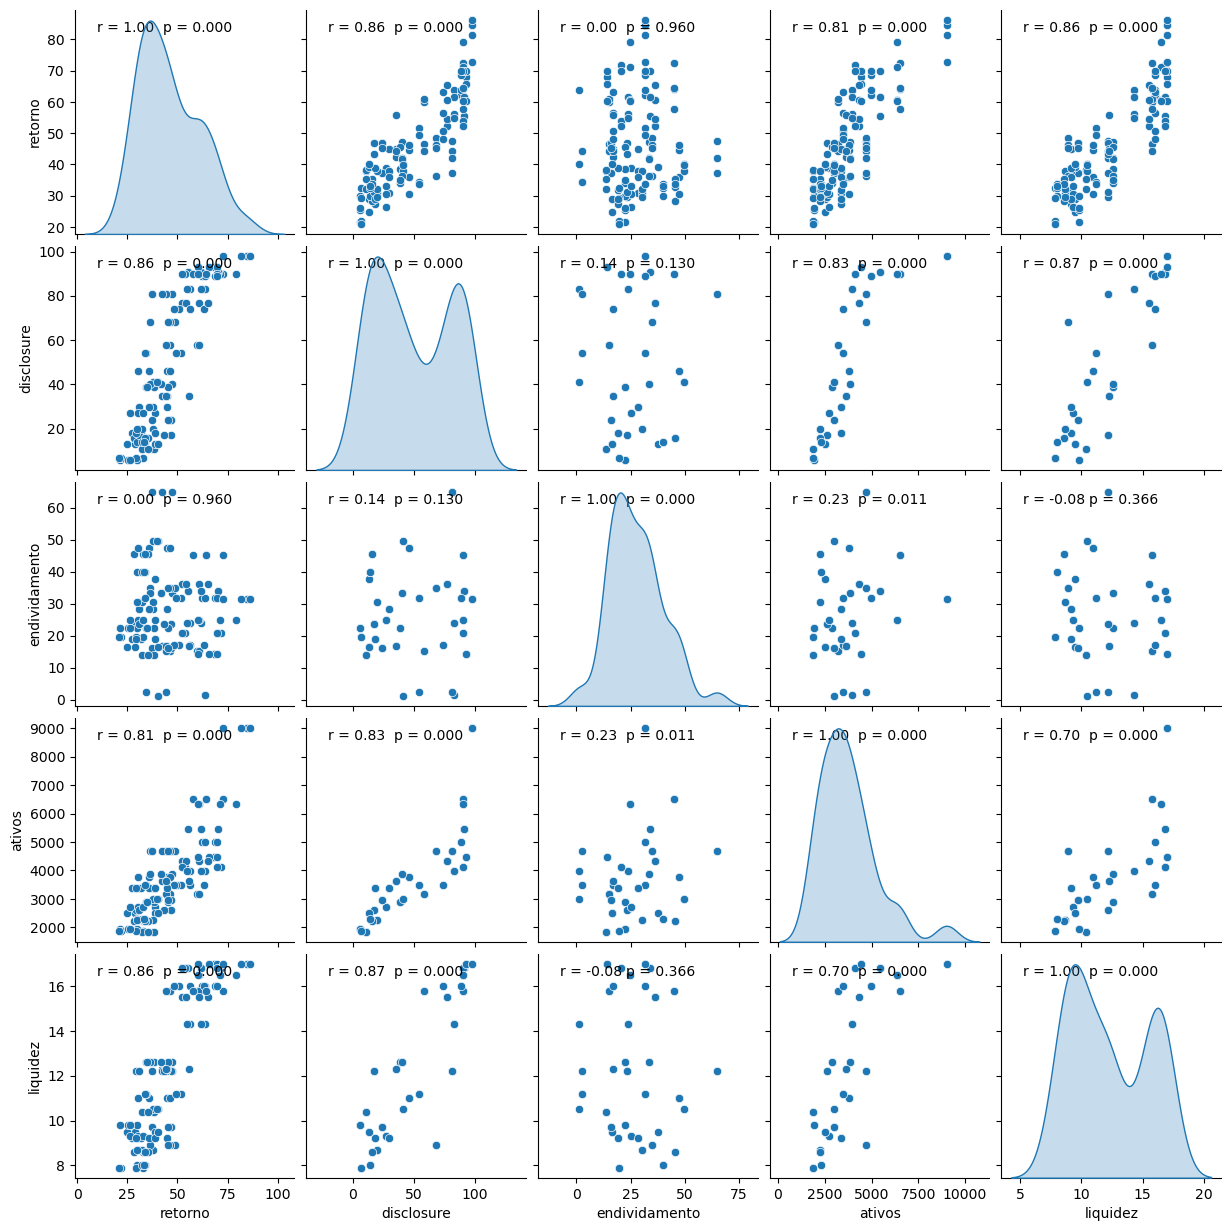

In [7]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_empresas, diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [8]:
# In[ ]: Estimando a Regressão Múltipla
modelo_empresas = sm.OLS.from_formula('retorno ~ disclosure +\
                                      endividamento + ativos +\
                                          liquidez', df_empresas).fit()

In [9]:
# Parâmetros do modelo
modelo_empresas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                retorno   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     147.9
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           3.35e-45
Time:                        19:12:08   Log-Likelihood:                -401.07
No. Observations:                 124   AIC:                             812.1
Df Residuals:                     119   BIC:                             826.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0506      4.080      1.483      0.141      -2.028      14.129
disclosure        0.1067      0.048      2.227      0.028       0.012       0.202
endividamento    -0.0882      0.051     -1.723      0.087      -0.190       0.013
ativos            0.0035      0.001      5.134      0.000       0.002       0.005
liquidez          1.9762      0.396      4.987      0.000       1.191       2.761
==============================================================================
Omnibus:                       35.509   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.127
Skew:                          -0.136   Prob(JB):                       0.0283
Kurtosis:                       1.858   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Note que o parâmetro da variável 'endividamento' não é estatisticamente
#significante ao nível de significância de 5% (nível de confiança de 95%).


# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

In [12]:
# Estimação do modelo por meio do procedimento Stepwise
modelo_step_empresas = stepwise(modelo_empresas, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 retorno ~ disclosure + endividamento + ativos + liquidez

 Discarding atribute "endividamento" with p-value equal to 0.08749071283026512 

Estimating model...: 
 retorno ~ disclosure + ativos + liquidez

 Discarding atribute "disclosure" with p-value equal to 0.0651402995431108 

Estimating model...: 
 retorno ~ ativos + liquidez

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'endividamento', 'p-value': 0.08749071283026512}
{'atribute': 'disclosure', 'p-value': 0.0651402995431108}

 Model after stepwise process...: 
 retorno ~ ativos + liquidez 

                            OLS Regression Results                            
Dep. Variable:                retorno   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     282.1
Date:                Thu, 

In [14]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_empresas.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9738705318499364,
 'statistics z': 2.0934256948868697,
 'p-value': 0.018155585344186213}

C:\Users\carlo\AppData\Local\Temp\ipykernel_7724\815874890.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modelo_step_empresas.resid, fit=norm, kde=True, bins=20)


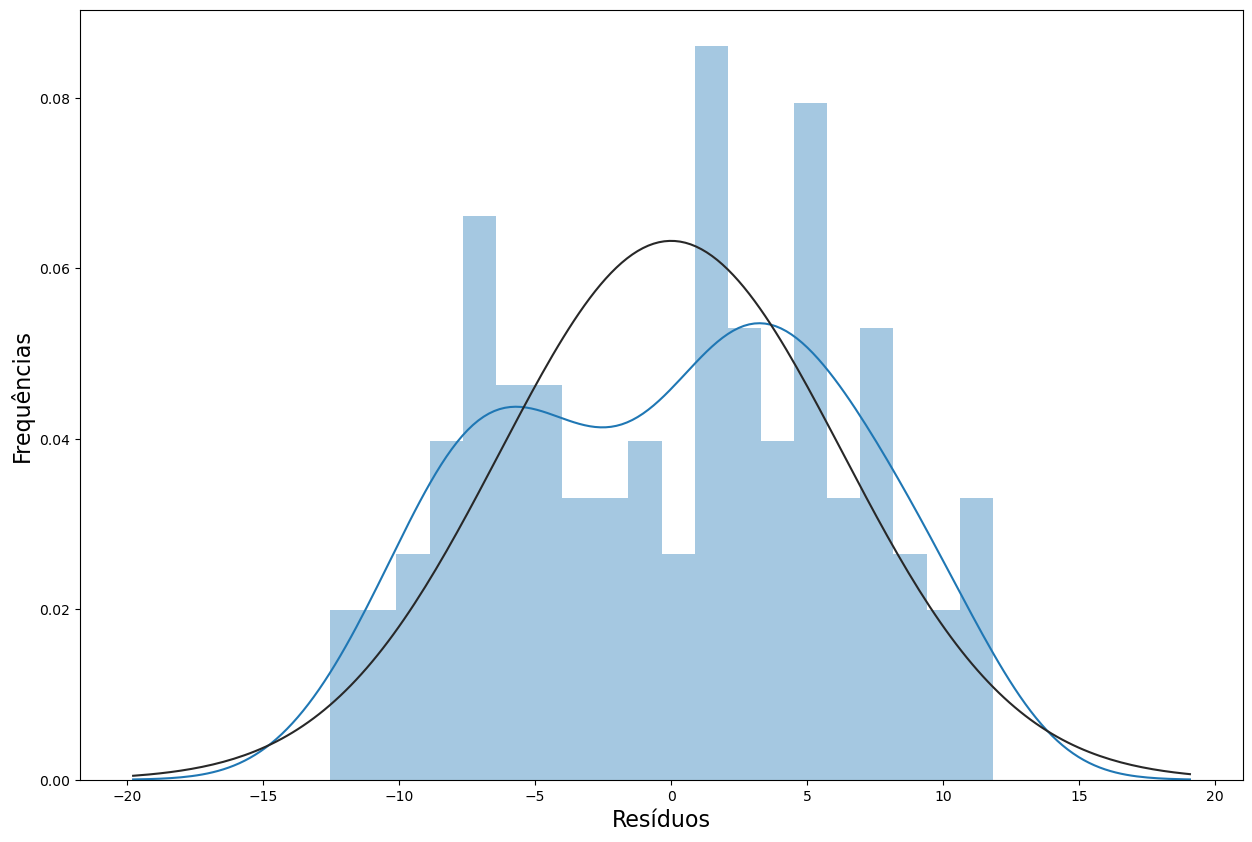

In [15]:
# In[ ]: Plotando os resíduos do modelo step_empresas e acrescentando
#uma curva normal teórica para comparação entre as distribuições

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_empresas.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [16]:
# In[ ]: Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

In [19]:
#xt é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
xt, lmbda = boxcox(df_empresas['retorno'])
print("Primeiros valores: ",xt[:5])
print("Lambda: ",lmbda)

Primeiros valores:  [3.9650019  3.83959941 3.78758231 3.81473115 4.02499897]
Lambda:  -0.022564100754067663


In [20]:
# In[ ]: Inserindo o lambda de Box-Cox no dataset para a estimação de um
#novo modelo
df_empresas['bc_retorno'] = xt
df_empresas

,empresa,retorno,disclosure,endividamento,ativos,liquidez,bc_retorno
0,Adidas,63.67,83.0,1.3,3967.0,14.3,3.965002
1,BASF,55.49,91.0,33.9,5450.0,16.8,3.839599
2,Bayer,52.42,77.0,36.1,4327.0,15.5,3.787582
3,BSH,54.00,90.0,20.8,4109.0,16.8,3.814731
4,Bosch,68.01,93.0,14.1,4458.0,17.0,4.024999
...,...,...,...,...,...,...,...
119,DuPont,39.85,41.0,49.5,2996.0,10.5,3.536070
120,ExxonMobil,44.16,35.0,16.8,3622.0,12.3,3.630464
121,FedEx,45.38,24.0,16.1,2972.0,9.7,3.655476
122,Ford Motors,45.25,68.0,34.8,4691.0,8.9,3.652844


In [21]:
# In[ ]: Estimando um novo modelo múltiplo com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_retorno ~ disclosure +\
                                endividamento + ativos +\
                                    liquidez', df_empresas).fit()

In [22]:
# Parâmetros do modelo
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_retorno   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     119.9
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           8.80e-41
Time:                        19:50:07   Log-Likelihood:                 74.551
No. Observations:                 124   AIC:                            -139.1
Df Residuals:                     119   BIC:                            -125.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8844      0.088     32.752      0.000       2.710       3.059
disclosure        0.0034      0.001      3.291      0.001       0.001       0.005
endividamento    -0.0013      0.001     -1.133      0.260      -0.003       0.001
ativos         4.331e-05   1.46e-05      2.967      0.004    1.44e-05    7.22e-05
liquidez          0.0359      0.009      4.202      0.000       0.019       0.053
==============================================================================
Omnibus:                        3.781   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.267
Skew:                          -0.303   Prob(JB):                        0.195
Kurtosis:                       2.486   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# In[ ]: Aplicando o procedimento Stepwise no 'modelo_bc"

modelo_step_empresas_bc = stepwise(modelo_bc, pvalue_limit=0.05)

#Note que a variável 'disclosure' acaba voltando ao modelo
#na forma funcional não linear!

Regression type: OLS 

Estimating model...: 
 bc_retorno ~ disclosure + endividamento + ativos + liquidez

 Discarding atribute "endividamento" with p-value equal to 0.2596629165625783 

Estimating model...: 
 bc_retorno ~ disclosure + ativos + liquidez

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'endividamento', 'p-value': 0.2596629165625783}

 Model after stepwise process...: 
 bc_retorno ~ disclosure + ativos + liquidez 

                            OLS Regression Results                            
Dep. Variable:             bc_retorno   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     159.0
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.21e-41
Time:                        19:53:56   Log-Likelihood:                 73.887
No. Observations:                 1

In [24]:
# In[ ]: Verificando a normalidade dos resíduos do 'modelo_step_empresas_bc'

# Teste de Shapiro-Francia
shapiroFrancia(modelo_step_empresas_bc.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9870486145293815,
 'statistics z': 0.6866622509558881,
 'p-value': 0.24614779513013502}

C:\Users\carlo\AppData\Local\Temp\ipykernel_7724\474574674.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modelo_step_empresas_bc.resid, fit=norm, kde=True, bins=20)


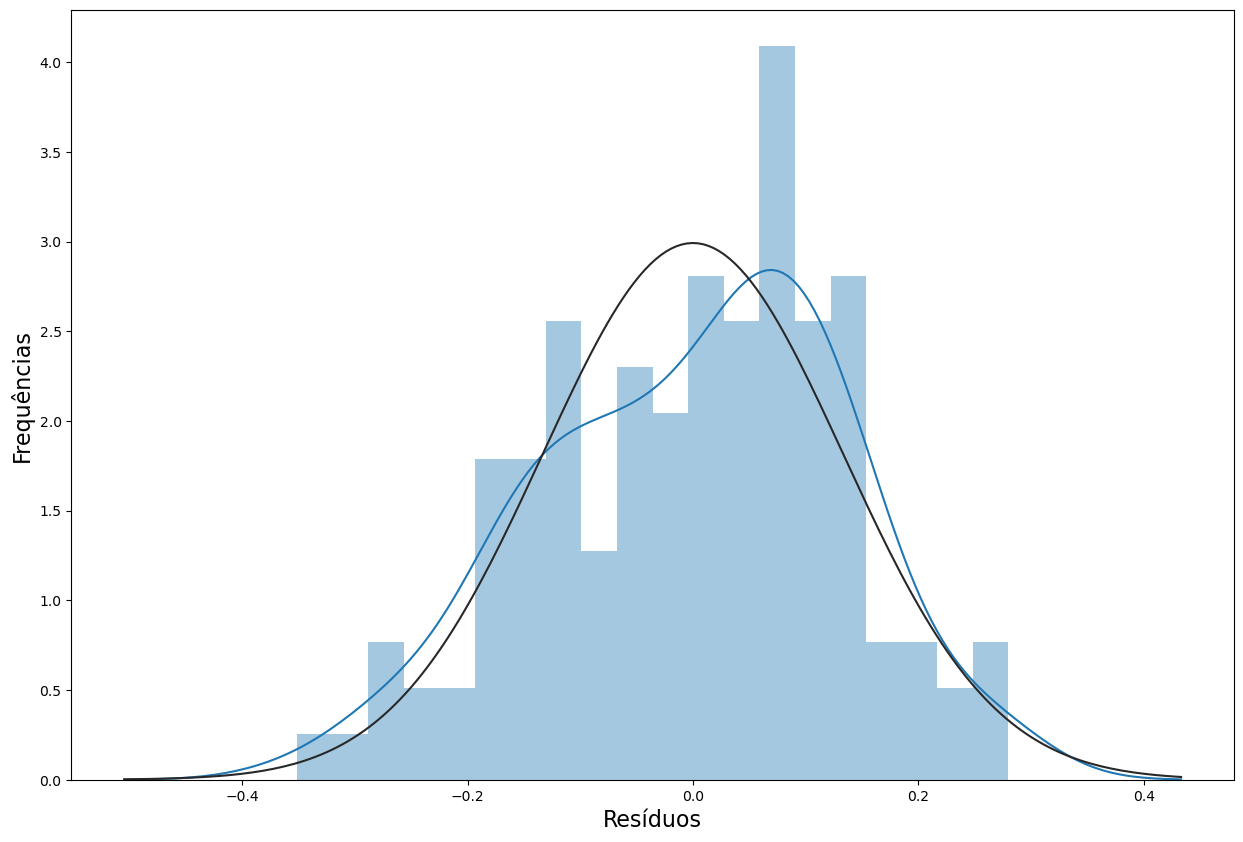

In [25]:
# In[ ]: Plotando os novos resíduos do 'modelo_step_empresas_bc'

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_empresas_bc.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [26]:
# In[ ]: Resumo dos dois modelos obtidos pelo procedimento Stepwise
#(linear e com Box-Cox)

summary_col([modelo_step_empresas, modelo_step_empresas_bc],
            model_names=["STEPWISE","STEPWISE BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,STEPWISE,STEPWISE BOX-COX
Intercept,-2.5348,2.8275***
,(2.3409),(0.0725)
R-squared,0.8234,0.7990
R-squared Adj.,0.8205,0.7940
ativos,0.0040***,0.0000***
,(0.0005),(0.0000)
disclosure,,0.0031***
,,(0.0010)
liquidez,2.7391***,0.0398***
,(0.2575),(0.0078)


In [27]:
# In[ ]: Fazendo predições com o modelo_step_empresas_bc
# Qual é o valor do retorno, em média, para disclosure igual a 50,
#liquidez igual a 14 e ativo igual a 4000, ceteris paribus?

modelo_step_empresas_bc.predict(pd.DataFrame({'const':[1],
                                              'disclosure':[50],
                                              'ativos':[4000],
                                              'liquidez':[14]}))

0    3.702016
dtype: float64

In [28]:
# In[ ]: Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted
#value de Y (retorno)

#Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted value de Y (retorno)
(3.702016 * lmbda + 1) ** (1 / lmbda)

47.74261279070688

In [29]:
# In[ ]: Salvando os fitted values de 'modelo_step_empresas' e
#'modelo_step_empresas_bc'

df_empresas['yhat_step_empresas'] = modelo_step_empresas.fittedvalues
df_empresas['yhat_step_empresas_bc'] = (modelo_step_empresas_bc.fittedvalues
                                        * lmbda + 1) ** (1 / lmbda)

In [30]:
#Visualizando os dois fitted values no dataset
#modelos 'modelo_step_empresas e modelo_step_empresas_bc
df_empresas[['empresa','retorno','yhat_step_empresas','yhat_step_empresas_bc']]

,empresa,retorno,yhat_step_empresas,yhat_step_empresas_bc
0,Adidas,63.67,52.590460,54.072393
1,BASF,55.49,65.403203,66.165319
2,Bayer,52.42,57.325376,56.706216
3,BSH,54.00,60.009319,62.161048
4,Bosch,68.01,61.960912,64.337230
...,...,...,...,...
119,DuPont,39.85,38.276327,38.078000
120,ExxonMobil,44.16,45.724617,41.446025
121,FedEx,45.38,35.988530,34.685312
122,Ford Motors,45.25,40.711577,41.929545


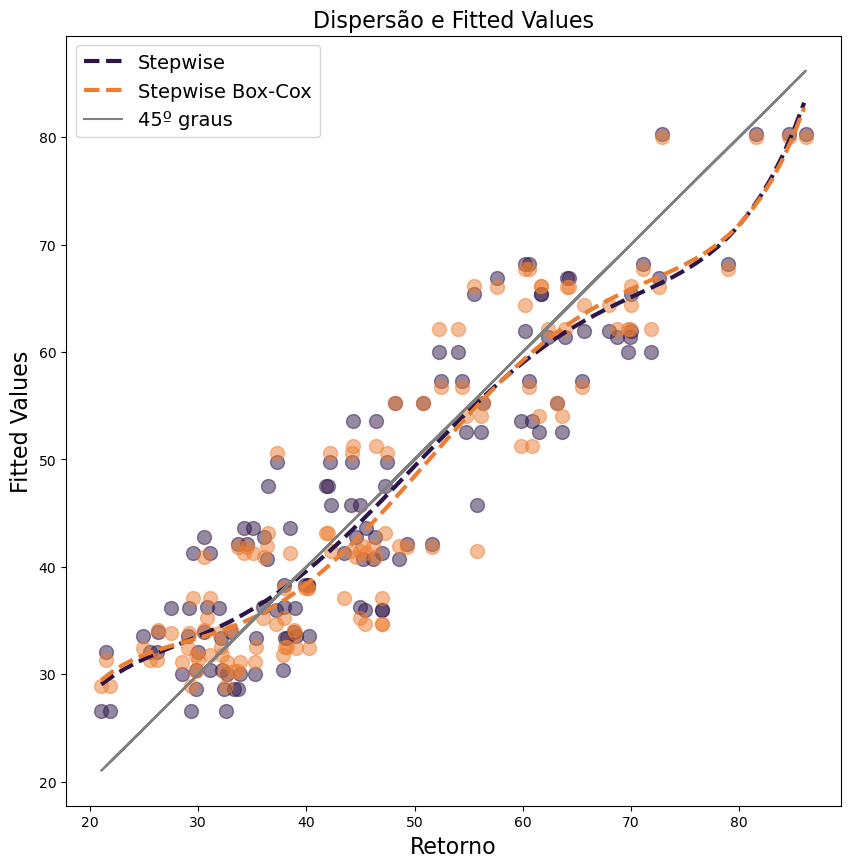

In [31]:
# In[ ]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df_empresas['retorno']
ydata_linear = df_empresas['yhat_step_empresas']
ydata_bc = df_empresas['yhat_step_empresas_bc']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_linear, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_bc, alpha=0.5, s=100, color='#ed7d31')
plt.xlabel('Retorno', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['Stepwise','Stepwise Box-Cox','45º graus'], fontsize=14)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()
